This is a project that predicts the rank of a T.V show based off the user score.
Here the rank is based only off of the Metacritic score. 

We are approching this problem with 2 approches.

 ->Linear Regression: This is more suitable for this project and is more accurate and faster.
 
 ->PCA: This is worse in every way however this is a LAA project so we are including this way as well.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import csv
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import random
from numpy.linalg import eig
#Sadness21.csv is the original csv
#Sadness_cleaned.csv without 
dat = open('sadness21.csv', 'r')
dat1 = open('sadness_cleaned.csv', 'w')
filet = csv.writer(dat1)
i=0
j=0
#Cleaning all the unnessary tbd scores
for row in csv.reader(dat):
    if j==0:
        j=1

        if row[3]!="tbd":
            filet.writerow(row)
    else:
        j=0       
dat.close()
dat1.close()
#Converting data into a useable format
data=pd.read_csv('sadness_cleaned.csv')
rank=data['rank'].tolist()
metac=data['metascore'].tolist()
users=data['userscore'].tolist()
ar=[[],[]]
ar[0]=rank
ar[1]=[int(i*10) for i in users]

Extracting ranks, metascore, userscore from csv.

Processing the data to prepare it for one hot encoding.

In [2]:
data = open('sadness_cleaned.csv', 'r')
d = {'1':[]}
j=0
for row in csv.reader(data):
    if j==0:
        j=1
        if "Season" in str(row[1]):
            try:
                index=row[1].index("Season")+7
                if row[1][index] not in d.keys():
                    d[row[1][index]]=[row[2]]
                else:
                    if row[2] not in d[row[1][index]]:
                        d[row[1][index]].append(row[2])
            except:
                print("",end="")
    else:
        j=0
d=dict(sorted(d.items()))
#Above data is data that is ready to be converted into one hot encoding if required.
#It is a dictionary of seasons : metacritc score

Graph plotting the relation of rank vs the metacritic score.

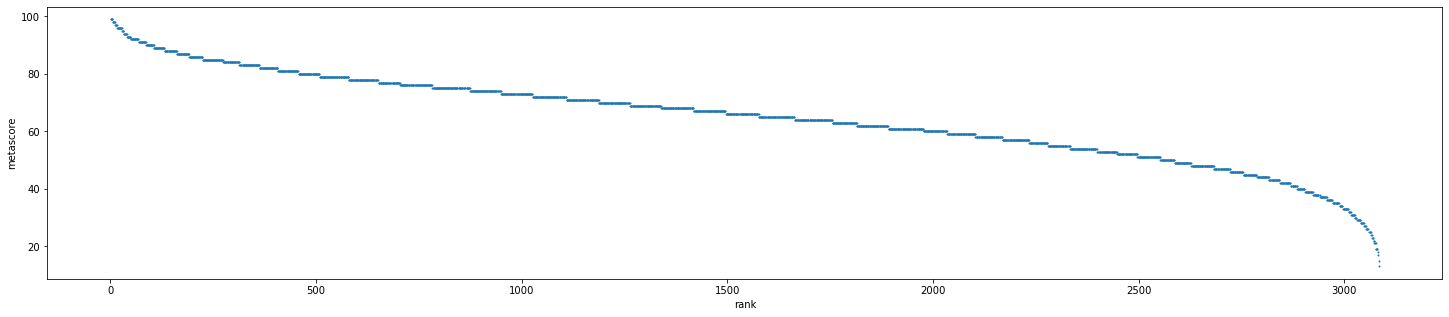

In [3]:
#Drawing the graph of rank vs metacritic score
gr=plt.figure()
gr.set_figwidth(25)
gr.set_figheight(5)
plt.scatter(rank,metac,s=1)
plt.xlabel('rank')
plt.ylabel('metascore')
plt.show()

In [ ]:
#Drawing graph of rank and user score along with best fit line
for i in range(0, len(users)):
    if users[i]=='tbd':
        users[i]=metac[i]/10
    users[i] = float(users[i])
gr1=plt.figure()
gr1.set_figwidth(30)
gr1.set_figheight(5)
plt.scatter(rank,users,s=1.5)
arr = np.stack((rank, users),axis=1)
plt.xlabel('rank')
plt.ylabel('userscore')
X = arr[:, 0].reshape(len(arr), 1)
y = arr[:, 1].reshape(len(arr), 1)
#LinearRegression for computing the line
model = LinearRegression()
model.fit(X,y)
y_line = model.predict(X)
print(f'The parameters of the line: {model.coef_}')
plt.plot(X, y_line, 'r')
plt.plot(X, y_line-0.35, 'g')
plt.plot(X, y_line+0.35, 'g')
plt.show()


Graph plotting the relation between rank vs user score.

We can see that there is a very slight connection beteween the two.
This SVR aims to train an model that can predict the rank of a show based off the user score. 

The red line is the best fit line which is used to determine the ranks
The 2 green are the decision boundries.

Recalculating the line in a more manupilatable form.

In [ ]:
#Recomputing line in a format we can store
X1 = sm.add_constant(X)
MODEL = sm.OLS(y,X1)
results = MODEL.fit()
print(results.summary())
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

In [6]:
x_new = sm.add_constant(X1.reshape((-1, 2)))
y_new = results.predict(x_new)
print(y_new)

[8.82121326 8.81973991 8.81826656 ... 4.28182374 4.28035039 4.27887704]


The above values are the best fit line values in the form of a list.

Now we accept the user score and metacritic score and give a predicted rank.

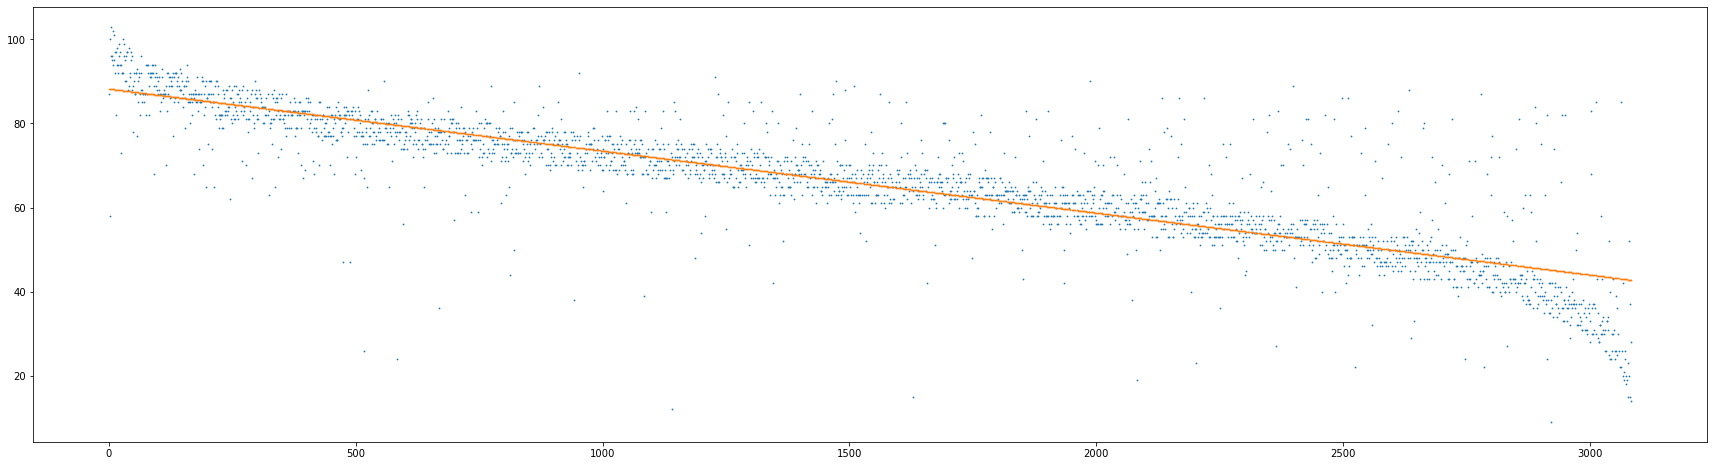

The rank generated using user score is 1453
The rank generated using Metacritic score is 1497


In [7]:
#Accepting the inputs
'''
new_use=int(input("Enter userscore [out of 100]"))
new_met=int(input("Enter Metacritic score"))
'''
ar1=np.transpose(np.array(ar))
pca = PCA(n_components=1)
pca.fit(ar1)
X_pca = pca.transform(ar1)
X_new = pca.inverse_transform(X_pca)
new_list=X_new.round(0).tolist()
new_list=[list( map(int,i) ) for i in new_list]
gr2=plt.figure()
gr2.set_figwidth(30)
gr2.set_figheight(8)
plt.scatter(ar1[:, 0], ar1[:, 1], s=0.6)
plt.scatter(X_new[:, 0], X_new[:, 1], s=0.3)
plt.show()
new_list1=[j for i,j in new_list]
new_use=65
new_met=65
high=0
low=int(len(new_list1)-1)
mid=int((high+low)/2)
#Index will represent rank here so we search for the score in our generated values.
if new_use<new_list1[low] or new_use>new_list1[high]:
    if new_use<new_list1[low]:
        mid=len(new_list1)
    else:
        mid=0
while low>=high:
    mid=int((high+low)/2)
    #print("new_list 1-> "+str(new_list1[mid])+"\n mid -> "+str(mid))
    if int(new_list1[mid])<new_use:
        low=mid+1
    elif int(new_list1[mid])>new_use:
        high=mid-1
    else:
        break
print("The rank generated using user score is "+str(mid))
#Index will represent rank here so we search for the score in our "actual" ranks.
high=0
low=int(len(metac)-1)
mid=int((high+low)/2)
if new_met<metac[low] or new_met>metac[high]:
    if new_met<metac[low]:
        mid=len(metac)
    else:
        mid=0
while low>=high:
    mid=int((high+low)/2)
    if int(metac[mid])<new_met:
        low=mid+1
    elif int(metac[mid])>new_met:
        high=mid-1
    else:
        break
print("The rank generated using Metacritic score is "+str(mid))

We can see above that the model is surpringly accurate despite using only a line rather than a curve.

Ignore code below

In [8]:
'''
ar1=np.transpose(np.array(ar))
rng = np.random.RandomState(1)
pca = PCA(n_components=2)
pca.fit(ar1)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(ar[0],ar[1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')



def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
#rng = np.random.RandomState(1)
#X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(ar1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(ar1[:, 0], ar1[:, 1],s=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

#print(X)
#print(np.transpose(np.array(ar)))
# plot principal components

X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

'''


"\nar1=np.transpose(np.array(ar))\nrng = np.random.RandomState(1)\npca = PCA(n_components=2)\npca.fit(ar1)\n\ndef draw_vector(v0, v1, ax=None):\n    ax = ax or plt.gca()\n    arrowprops=dict(arrowstyle='->',\n                    linewidth=2,\n                    shrinkA=0, shrinkB=0)\n    ax.annotate('', v1, v0, arrowprops=arrowprops)\n\n# plot data\nplt.scatter(ar[0],ar[1], alpha=0.2)\nfor length, vector in zip(pca.explained_variance_, pca.components_):\n    v = vector * 3 * np.sqrt(length)\n    draw_vector(pca.mean_, pca.mean_ + v)\nplt.axis('equal')\n\n\n\ndef draw_vector(v0, v1, ax=None):\n    ax = ax or plt.gca()\n    arrowprops=dict(arrowstyle='->',\n                    linewidth=2,\n                    shrinkA=0, shrinkB=0)\n    ax.annotate('', v1, v0, arrowprops=arrowprops)\n#rng = np.random.RandomState(1)\n#X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T\npca = PCA(n_components=2, whiten=True)\npca.fit(ar1)\n\nfig, ax = plt.subplots(1, 2, figsize=(16, 6))\nfig.subplots_adjust(

In [9]:
'''
from sklearn.mixture import GaussianMixture as GMM

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        print(covariance)
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

rng = np.random.RandomState(5)
X = np.dot(rng.randn(500, 2), rng.randn(2, 2))

for i, cov_type in enumerate(['diag', 'spherical', 'full']):
    model = GMM(1, covariance_type=cov_type).fit(X)
    ax[i].axis('equal')
    ax[i].scatter(X[:, 0], X[:, 1], alpha=0.5)
    ax[i].set_xlim(-3, 3)
    ax[i].set_title('covariance_type="{0}"'.format(cov_type),size=14, family='monospace')
    print(model.covariances_)
    print("1")
    draw_ellipse(model.means_[0], model.covariances_[0], ax[i], alpha=0.2)
    ax[i].xaxis.set_major_formatter(plt.NullFormatter())
    ax[i].yaxis.set_major_formatter(plt.NullFormatter())
'''

'\nfrom sklearn.mixture import GaussianMixture as GMM\n\nfrom matplotlib.patches import Ellipse\n\ndef draw_ellipse(position, covariance, ax=None, **kwargs):\n    """Draw an ellipse with a given position and covariance"""\n    ax = ax or plt.gca()\n    \n    # Convert covariance to principal axes\n    if covariance.shape == (2, 2):\n        U, s, Vt = np.linalg.svd(covariance)\n        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))\n        width, height = 2 * np.sqrt(s)\n    else:\n        print(covariance)\n        angle = 0\n        width, height = 2 * np.sqrt(covariance)\n    \n    # Draw the Ellipse\n    for nsig in range(1, 4):\n        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))\n\nfig, ax = plt.subplots(1, 3, figsize=(14, 4), sharex=True, sharey=True)\nfig.subplots_adjust(wspace=0.05)\n\nrng = np.random.RandomState(5)\nX = np.dot(rng.randn(500, 2), rng.randn(2, 2))\n\nfor i, cov_type in enumerate([\'diag\', \'spherical\', \'full\']):\n    mod